# Supervised Machine Learning

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import Dataset
dataset = pd.read_csv("salaryData.csv")

In [5]:
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [6]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [9]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
dataset.shape

(30, 2)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
dataset.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [13]:
dataset.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [14]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
dataset.iloc[2:6]

,YearsExperience,Salary
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [16]:
# correlation (Dependency of one variable onto another variable)
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [17]:
dataset.nunique()

YearsExperience    28
Salary             30
dtype: int64

## Visualization using Scatter Plot

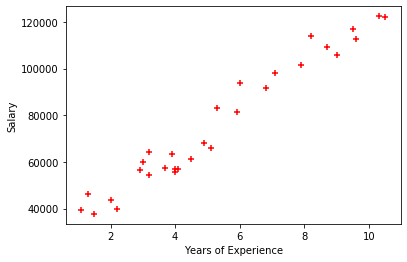

In [18]:
x = dataset['YearsExperience']
y = dataset['Salary']
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',marker='+')
plt.show()

## Spliting of dataset into testing and training

In [19]:
x = dataset.iloc[:,:-1].values    # x is features 2D Numpy array
y = dataset.iloc[:,1].values      # y is lablel   1D Numpy array

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=1) # random_size: reproduce same dataset for training and testing after running algorithm everytime

In [21]:
# Creating simple linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # y=ax+b

Mymodel = model.fit(xtrain,ytrain)

## Prediction

In [22]:
y_pred = Mymodel.predict(xtest)

## Difference of y_pred is predicted by model and ytest is actual

In [23]:
print(y_pred)

[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]


In [24]:
print(ytest)

[ 83088.  98273.  63218.  93940.  61111.  91738. 116969.  43525. 109431.
 101302.]


In [25]:
Mymodel.predict([[9]])

array([108560.49280278])

In [26]:
Mymodel.coef_

array([9158.13919873])

In [27]:
Mymodel.intercept_

26137.240014196934

In [28]:
# y=mx+c , x=9
y = 9158.13919873*9 + 26137.240014196934
print(y)

108560.49280276694


## visualize line by scatter plot

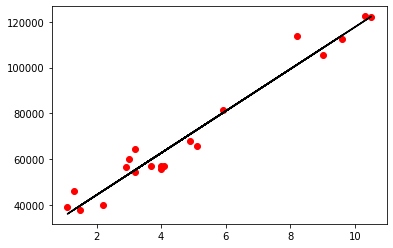

In [29]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,Mymodel.predict(xtrain),color='black')
plt.show()

# How to Save a Model

## 1) Pickle

In [30]:
import pickle

In [31]:
with open('modelsave_pickle', 'wb') as file:  # wb: write bytes
    pickle.dump(Mymodel,file)

## Load Model and Prediction

In [32]:
with open('modelsave_pickle', 'rb') as  file:   # rb: read bytes
    newmodel = pickle.load(file)

## Prediction 

In [33]:
newmodel.predict([[5]])

array([71927.93600785])

## 2) joblib

In [38]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.externals import joblib

In [40]:
joblib.dump(Mymodel, 'modelsave_joblib')

['modelsave_joblib']

## Load Model and Prediction

In [41]:
newmodel = joblib.load('modelsave_joblib')

## Prediction 

In [42]:
newmodel.predict([[5]])

array([71927.93600785])